<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

_Plotting (Need)_: used Matlab-like **pyplot(`plt`)** interface.

_Plotting (Good)_: **Object Oriented (`OO`)** interface - more nuanced control over what is going on by allowing us to manipulate the various axes easily.

# 1 Some nomenclature

**Figure**: full canvas you use to draw stuff on. 

**Axis**: individual mathematical axes use for plotting. 

# 2 Comparing the two ‘dialects’

**`pyplot` interface**: quick and dirty plots  
**`OO` interface**: more complex plots that demand control and finesse.

### pyplot Interface

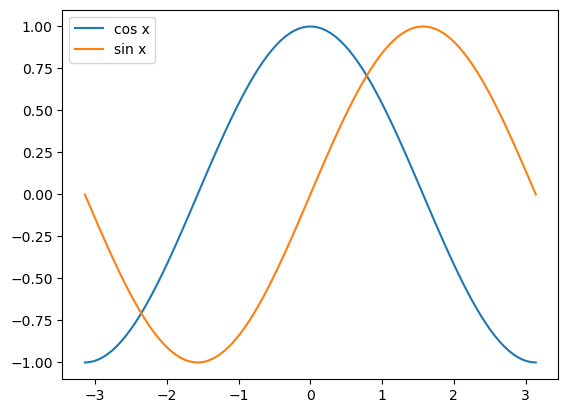

In [6]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

- Start by using `subplots()` to ask Matplotlib to create a figure and an axis.

- Matplotlib obliges and gives us a figure (`fig`) and an axis (`ax`).
- `fig` and `ax`: you are free to call them whatever you like, but this is what is commonly used in the documentation. 

In this example, I need only one column and one row. But, if I want, I can ask for a grid.

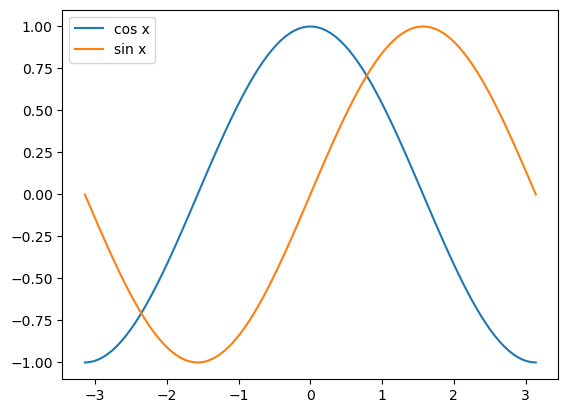

In [7]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

# 3 What is OO ax, really?

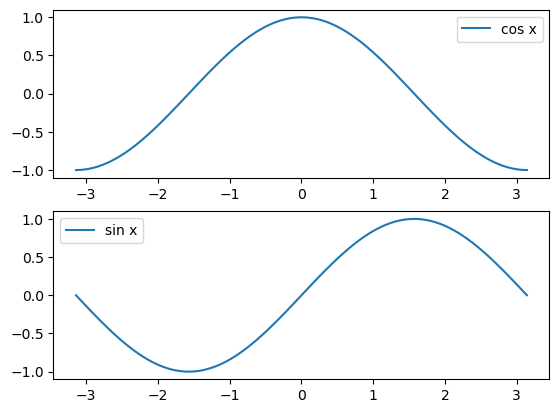

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

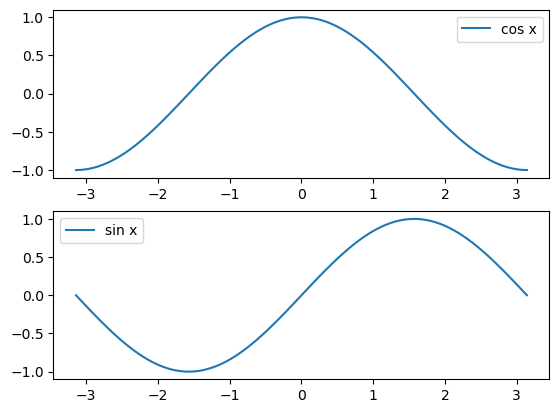

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [10]:
type(ax) # what is ax? 
         # it is a numpy array

numpy.ndarray

In [11]:
ax.shape # what size is ax?
         # has two 'things'

(2,)

In [12]:
type(ax[0]) # what is contained in x? 
            # a Matplotlib axis

matplotlib.axes._axes.Axes

# 4 A complete OO example

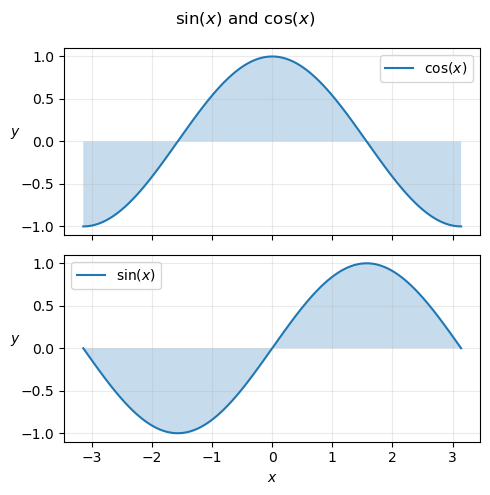

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1,  # setting up axes, 2 rows, 1 column 
                       figsize=(5, 5),    # changing figure size
                       sharex=True)       # asking that the plots share the same x-axis

# the number of axes essentially refers to the number of graphs you will be plotting
# number of axes = no. of rows * no. of columns

# Since ax is a NumPy array with two axes, we can index them using 0 and 1. Then we just plot to that axis.
ax[0].plot(x, cos_x, label=r'$\cos(x)$') 

# Use fill_between() to fill the plots. Indexed the NumPy array to access the axes.
ax[0].fill_between(x, 0, cos_x, alpha=.25)

ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

# Draw the legends
# As in the previous example, we can do this one axis at a time. 
# However, a more sensible way to do this is with a for loop that iterates through the items in ax
for a in ax:
    a.legend()
    a.grid(alpha=.25) # set grid default 0.25
    a.set_ylabel('$y$', rotation=0) # set label

# We are sharing the x-axis. So, we only need to label the lowest (bottom of figure) plot. This has the index 1.
ax[1].set_xlabel('$x$') 

# Adding a subtitle to the FIGURE (not plot!)
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# Help to tidy and make plot look nice
fig.tight_layout()

Text(0.5, 0.98, '$\\sin(x)$ and $\\cos(x)$')

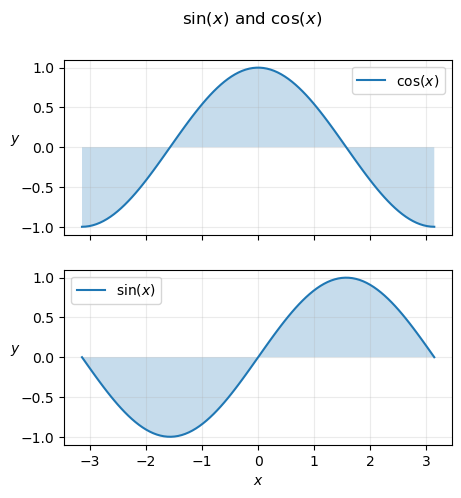

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)


ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)


ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

# REMOVE THE 'fig.tight_layout()' FUNCTION

#### NOTE: the pyplot and OO interfaces don’t use identical function names. For example, pyplot used `xlabel()` to set the x label, but OO uses `set_xlabel()`.

# 5 Multiple rows and columns

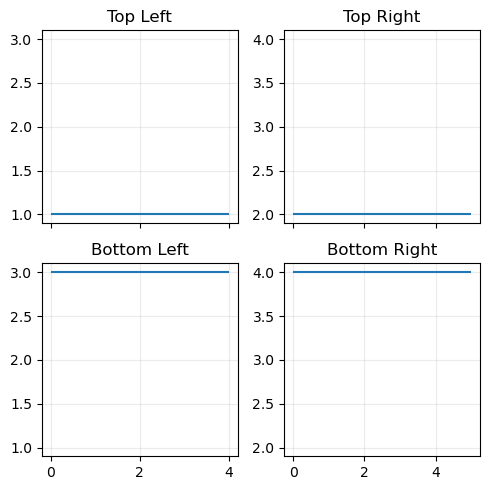

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

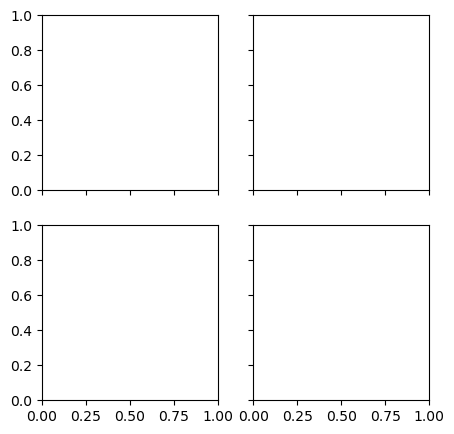

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, # 2 rows, 2 columns --> 4 axes (4 graphs)
                       figsize=(5, 5),
                       sharex='col', sharey='row')

In [17]:
ax.shape # how is ax structured? 
         # ax is a 2 x 2 array

(2, 2)

In [18]:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

In [19]:
# a easier way to use ax
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [20]:
# or 
# unpacking = ax.flatten()
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# 'flatten()' takes the 2D array and ‘flattens’ it into a 1D array; unpacking takes care of the assignments.

### Drawing the lines

In [21]:
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## Sharing axes

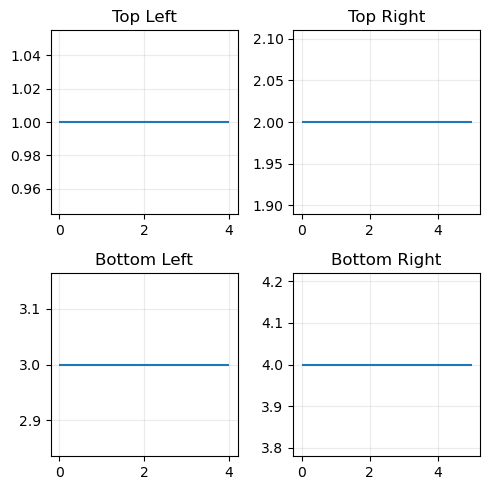

In [22]:
# REMOVING sharex() and sharey() FUNCTION FROM PLOT SET UP
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

# Based on the output, Matplotlib has auto-scaled both axes. 
# In particular, the plots on the left go from 0 to 4, and those on the right go from 0 to 5, as these are the lengths used for the lines.

| Option | Result                                 |
|:------:|----------------------------------------|
|  `True`  | Makes all the **axes** use the same range. |
|   `col`  | Use the same range for all the **columns** |
|   `row`  | Use the same range for all the **rows**    |

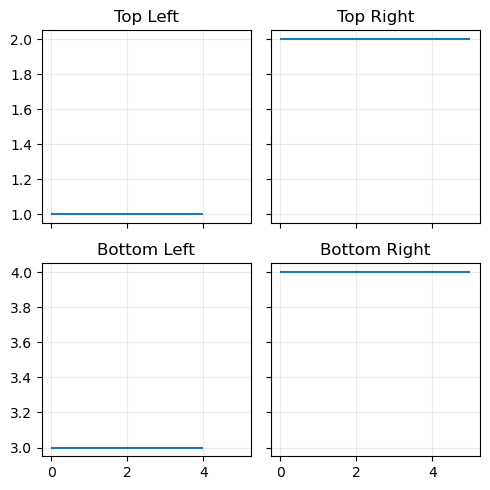

In [23]:
# USING True

fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

# Based on the output, notice how all the plots have the same range for the x-axis.

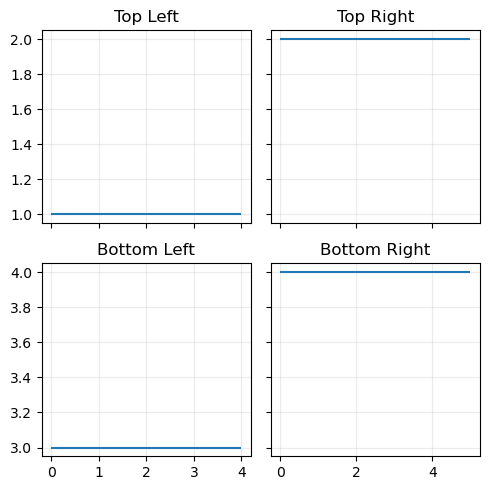

In [24]:
# USING 'col'

fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

# Based on the output, notice how all the plots fit the axis more perfectly now.

#### NOTE: how you decide on the most correct depends on what story you are trying to communicate with your plot.

## Accessing all axes

In [25]:
# inefficient
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

# more efficient
for a in ax.flatten():
    a.grid(alpha=.25)

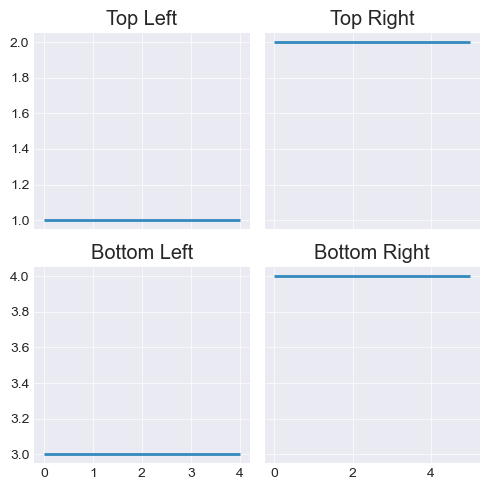

In [35]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

plt.tight_layout()


# Other useful plots

## Histograms

showing distributions of data

### Data

Downloaded 

[Mean basic monthly earnings by graduates ALL](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)

[Mean basic monthly earnings by graduates NUS ONLY](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)

### A quick helper function

In [36]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

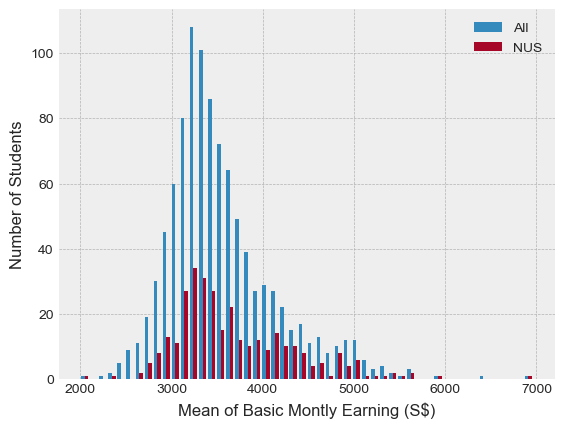

In [37]:
plt.style.use('bmh')
data = get_plot_data()

plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## Scatter plots

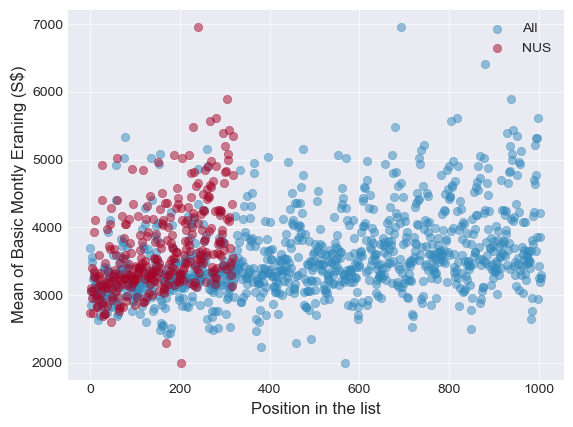

In [38]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

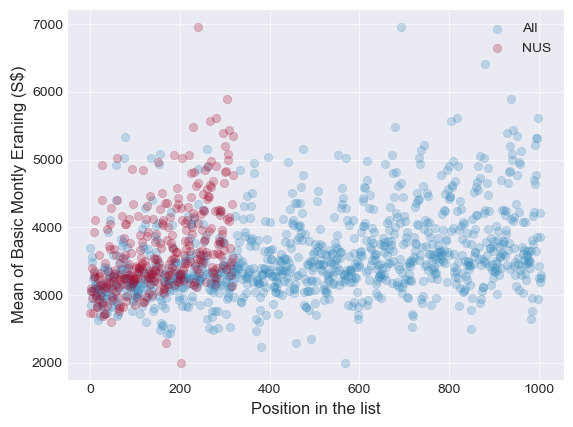

In [39]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers)) # use range() along with len() to generate a list [0,1,2...] appropriate to the dataset
    y = numbers
    plt.scatter(x, y, label=label, alpha=.25) # Changing to a lower alpha value gives a lighter colour shade

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## Bar charts

Text(0, 0.5, 'Number of Students')

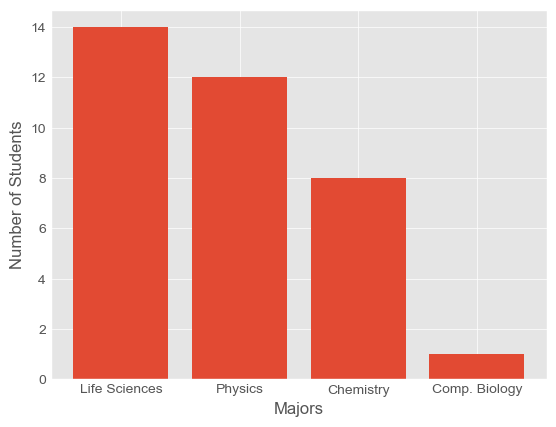

In [40]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

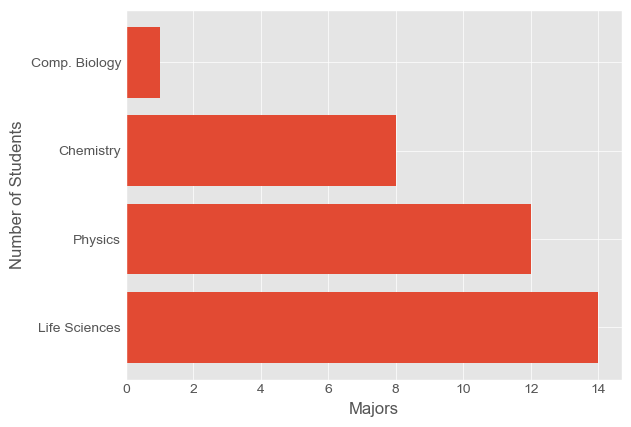

In [41]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.barh(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## Pie charts

Text(0.5, 1.0, 'Percentage of each major')

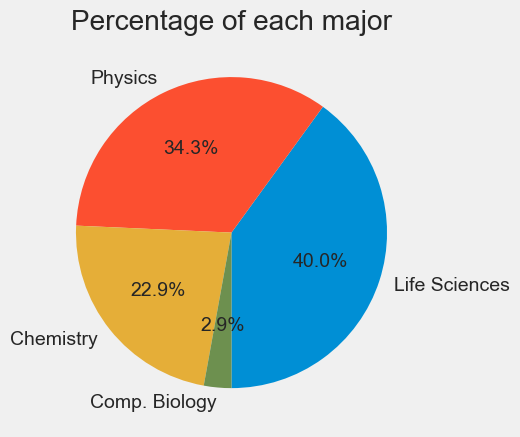

In [42]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')

Text(0.5, 1.0, 'Percentage of each major')

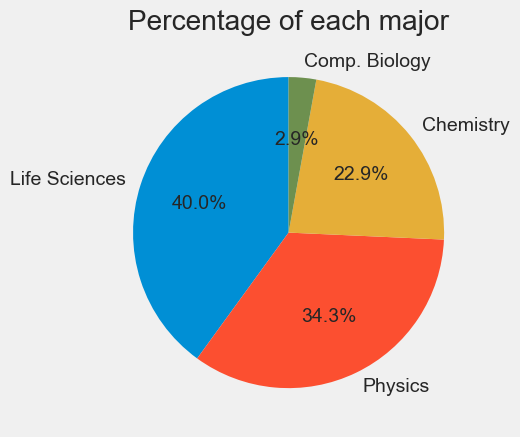

In [43]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=90            
        )
plt.title('Percentage of each major')